### Problem Statement
You are a data scientist / AI engineer at an educational consulting firm. You have been provided with a dataset named **`"student_scores.csv"`**, which includes records of the number of hours students studied and the marks they obtained. The dataset comprises the following columns:

- `hours:` The number of hours a student studied.
- `scores:` The marks obtained by the student.

Your task is to use this dataset to build a polynomial regression model to predict the marks of students based on the number of hours they studied. You will need to split the data into training and test sets, train the model, and evaluate its performance using appropriate metrics.

**Import Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Task 1: Data Preparation and Exploration

1. Import the data from the `"student_scores.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Visualize the relationship between the number of hours studied and the marks obtained.

In [4]:
df=pd.read_csv("student_scores.csv")
print(df.shape)
df.head()

(100, 2)


,hours,scores
0,4.4,20.0
1,9.6,90.0
2,7.6,58.0
3,6.4,31.0
4,2.4,5.0


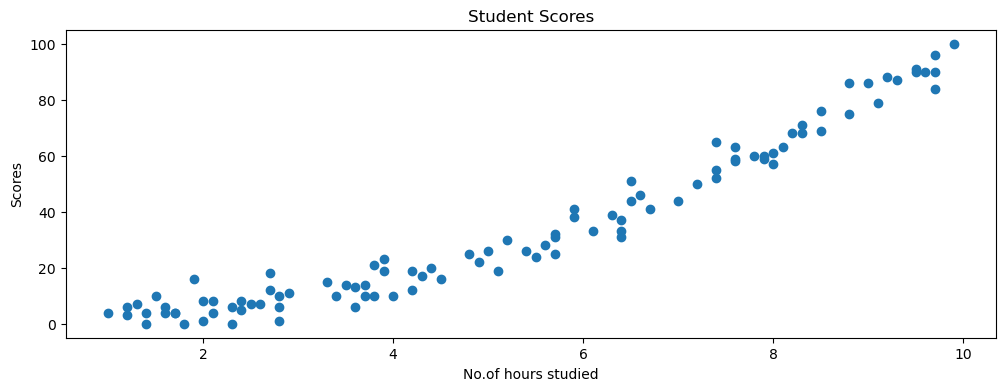

In [5]:
plt.figure(figsize=(12,4))
plt.scatter(df["hours"],df["scores"])
plt.xlabel("No.of hours studied")
plt.ylabel("Scores")
plt.title("Student Scores")
plt.show()

### Task 2: Train a Polynomial Regression Model

1. Select the feature (hours) and the target variable (scores) for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Create a Polynomial Features transformer with a degree of 3 and transform the training and test sets.
4. Create a Linear Regression model and fit it using the transformed training data.
5. Print the model's coefficients and intercept.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [7]:
X=df[["hours"]]
y=df["scores"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
poly=PolynomialFeatures(degree=3)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [9]:
model=LinearRegression()
model.fit(X_train_poly,y_train)
print(model.coef_,model.intercept_)

[ 0.         -4.4308579   1.71393503 -0.03669951] 7.691872832731704


### Task 3: Model Evaluation
1. Make predictions on the test set using the trained model.
2. Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics.
3. Print the MSE and R2 values.

In [10]:
y_pred=model.predict(X_test_poly)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(mse,r2)

15.028613094999933 0.9866904297085334
